#### Name:  Sundipta Rao
#### Date: 4/19/16

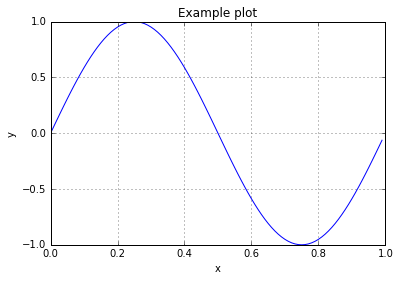

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,1.0, 0.01)
y = np.sin(2*np.pi*x)
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example plot')

### Base calling for Illumina sequencing

Simulate and plot $y(1),\dots,y(L)$ according to the probability model (for $s(t)$ being i.i.d. equally probable to be 0 or 1). Do this for various values of $p=0,0.01,0.05,0.1,0.2 $ and for $\sigma^2 = 0.1$

In [238]:
import math

L = 100 #time
s = np.random.randint(2, size= L) 
#print s

# constants
probs = [0,0.01,0.05,0.1,0.2]
sigma = 0.1 

def q_matrix(p,L):
    q = np.zeros((L,L))
    for t in range(1,L+1):
        for j in range(1,t+1):
            q[j-1,t-1] = math.factorial(t)/(math.factorial(j)*math.factorial(t-j))*((1-p)**j)*(p**(t-j))
    return q
    
#initialize loop
whys = []
queues = []
for x in probs:
    Q = q_matrix(x,L)
    queues.append(Q)
    y = Q.dot(s) + np.random.normal(0, math.sqrt(sigma),s.shape[0])
    whys.append(y)

In [245]:
q_matrix(0.3,3)

array([[ 0.7  ,  0.42 ,  0.189],
       [ 0.   ,  0.49 ,  0.441],
       [ 0.   ,  0.   ,  0.343]])

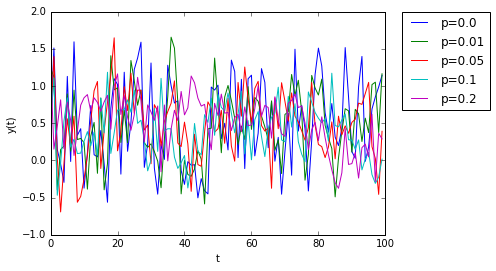

In [160]:
x = range(L)
plt.plot(x, whys[0],label="p=0.0")
plt.plot(x, whys[1],label="p=0.01")
plt.plot(x, whys[2],label="p=0.05")
plt.plot(x, whys[3],label="p=0.1")
plt.plot(x, whys[4],label="p=0.2")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Zero-forcing equalizer and the decoding rule, simulated for different values of $p$ plot its quality score $Q$ as a function of position along the DNA sequence. 

In [190]:
iterations = 100
avgs = []
qscores = []
for q in queues:
    errors = []
    for i in range(iterations):
        #generate y's
        yz = q.dot(s) + np.random.normal(0, math.sqrt(sigma),s.shape[0])
        #simulate s
        estimate = np.linalg.inv(q).dot(yz)
        #get error
        e = np.abs(s - estimate) > 0.5
        errors.append(e)
    #calculate average errors
    avg_errors = np.sum(np.array(errors),axis = 0)/ float(iterations)
    avgs.append(avg_errors)
    #calculate quality scores
    quality = -10*np.log10(avg_errors)
    qscores.append(quality)

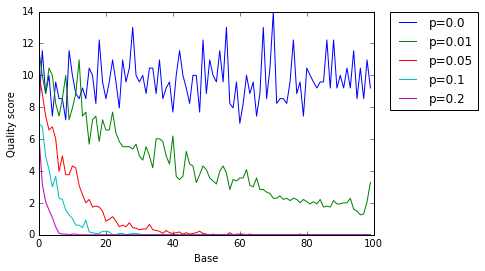

In [192]:
x = range(L)
plt.plot(x, qscores[0],label="p=0.0")
plt.plot(x, qscores[1],label="p=0.01")
plt.plot(x, qscores[2],label="p=0.05")
plt.plot(x, qscores[3],label="p=0.1")
plt.plot(x, qscores[4],label="p=0.2")
plt.ylabel('Quality score')
plt.xlabel('Base')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

MMSE equalizer and the corresponding decoding rule, simulated for different values of $p$ plot the resulting quality score as a function of position along the DNA sequence.

In [210]:
iterations_mm = 1000
avgs_mm = []
qscores_mm = []
for q in queues:
    errors_mm = []
    for i in range(iterations_mm):
        #generate y's
        y_mm = q.dot(s) + np.random.normal(0, math.sqrt(sigma),s.shape[0])
        #simulate s using MMSE
        estimate_mm = q.T.dot((np.linalg.inv(q.dot(q.T)+(sigma**2)*np.eye(L)))).dot(y_mm)
        #get error
        e_mm = np.abs(s - estimate_mm) > 0.5
        errors_mm.append(e_mm)
    #calculate average errors
    avg_errors_mm = np.sum(np.array(errors_mm),axis = 0)/ float(iterations_mm)
    avgs_mm.append(avg_errors_mm)
    #calculate quality scores
    quality_mm = -10*np.log10(avg_errors_mm)
    qscores_mm.append(quality_mm)

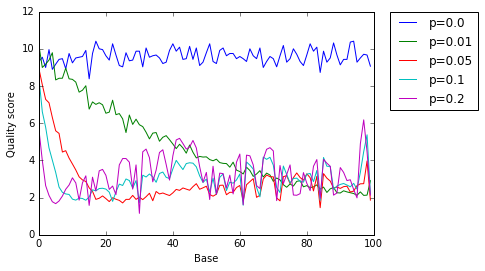

In [212]:
x = range(L)
plt.plot(x, qscores_mm[0],label="p=0.0")
plt.plot(x, qscores_mm[1],label="p=0.01")
plt.plot(x, qscores_mm[2],label="p=0.05")
plt.plot(x, qscores_mm[3],label="p=0.1")
plt.plot(x, qscores_mm[4],label="p=0.2")
plt.ylabel('Quality score')
plt.xlabel('Base')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Quality score plotted for a fixed $p=0.05$ as a function of the position $m$. 

In [239]:
q_five= q_matrix(0.05,L)
iterations_mb = 1000
avgs_mb = []
qscores_mb = []

errors_mb = []
for i in range(iterations_mb):
    #generate y's
    y_mb = q_five.dot(s) + np.random.normal(0, math.sqrt(sigma),s.shape[0])
    #simulate s using MMSE
    estimate_mb = q_five.T.dot(y_mb)
    #get error
    e_mb = np.abs(s - estimate_mb) > 0.5
    errors_mb.append(e_mb)
#calculate average errors
avg_errors_mb = np.sum(np.array(errors_mb),axis = 0)/ float(iterations_mb)
avgs_mb.append(avg_errors_mb)
#calculate quality scores
quality_mb = -10*np.log10(avg_errors_mb)
qscores_mb.append(quality_mb)

/Users/Sundipta/venv2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


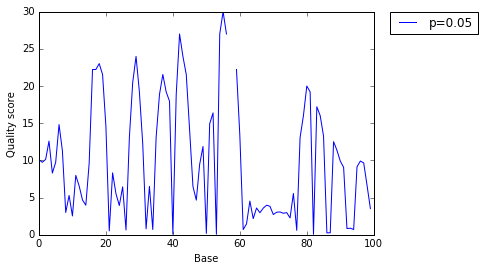

In [241]:
x = range(L)
plt.plot(x, quality_mb,label="p=0.05")
plt.ylabel('Quality score')
plt.xlabel('Base')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Read alignment with Bowtie

Number of distinct 20-length substrings across all reads? 

In [246]:
import matplotlib.pyplot as plt
import numpy as np


with open("e.coli_k12_atcc_700926.fastq", 'r') as f:
    content = f.readlines()

    # take the line with the sequences (the second line every four lines)
    bases = [line.strip() for line in content[1::4]]
    # print bases[0:3]

len(bases) # number of sequencing reads

644022

In [162]:
# Start with an empty dictionary
k = 20
counts = {}
# Calculate how many kmers of length k there are
# Use k = 150 and only iterate once to determine the number of sequencing repeats
num_kmers = 150 - k 
for base in bases:
# Loop over the kmer start positions
    for i in range(num_kmers):
        kmer = base[i: i+k]
        # Add the kmer to the dictionary if it's not there
        if kmer not in counts:
            counts[kmer] = 0
        # Increment the count for this kmer
        counts[kmer] += 1
len(counts.keys())

14606414

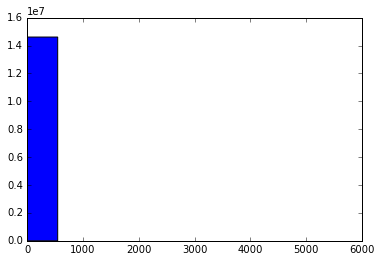

In [163]:
plt.hist(counts.values())
plt.show()

In [105]:
#looking at the max values
counts_list = dict.items(counts)
max(counts_list, key=lambda x: x[1])

('NNNNNNNNNNNNNNNNNNNN', 5456)

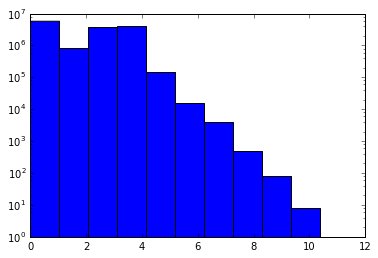

In [164]:
del counts['NNNNNNNNNNNNNNNNNNNN']
#plt.hist(counts.values())
plt.hist(np.log2(counts.values()), log=True)
plt.show()